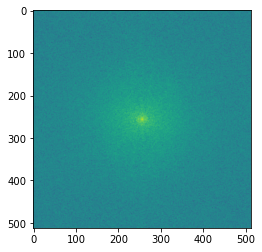

<ipython-input-2-eef8d00b34ed>:30: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


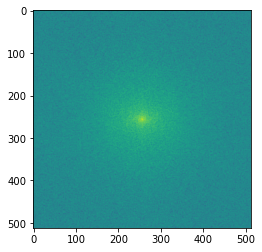

<ipython-input-2-eef8d00b34ed>:52: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


(368, 512, 512)
(176, 512, 512)


In [2]:
from matplotlib import pyplot as plt, cm
import numpy as np
import glob, os
import h5py
import ntpath
import SimpleITK as sitk
import cv2

DATA_DIR_MASK_TRAIN = "C:/Users/Kevin/Desktop/patient data/mask/train"
DATA_DIR_MASK_TEST = "C:/Users/Kevin/Desktop/patient data/mask/test"


def getImageTensor_mask(patientDirectory_train, patientDirectory_test):
    
    patients_train = glob.glob(os.path.join(patientDirectory_train, '*'))
    final_arr_train = []
    
    patients_test = glob.glob(os.path.join(patientDirectory_test, '*'))
    final_arr_test = []

    #for training mask
    for patientDirectory in patients_train:
        patientFileSliceArr = glob.glob((os.path.join(patientDirectory, '*')))
        for patientSlice in patientFileSliceArr:
            image = cv2.imread(patientSlice, cv2.IMREAD_GRAYSCALE)

            #fourier transform
            f = np.fft.fft2(image)
            fshift = np.fft.fftshift(f)
            magnitude_spectrum = 20*np.log(np.abs(fshift))
            magnitude_spectrum = np.asarray(magnitude_spectrum)
            img_photo = magnitude_spectrum
            magnitude_spectrum = np.expand_dims(magnitude_spectrum, axis = 0)

            if len(final_arr_train) == 0:
                final_arr_train = magnitude_spectrum
                plt.imshow(img_photo)
                plt.show()

            else:
                final_arr_train = np.append(final_arr_train, magnitude_spectrum , axis = 0)
                
    #for testing mask       
    for patientDirectory in patients_test:
        patientFileSliceArr = glob.glob((os.path.join(patientDirectory, '*')))
        for patientSlice in patientFileSliceArr:
            image = cv2.imread(patientSlice, cv2.IMREAD_GRAYSCALE)

            #fourier transform
            f = np.fft.fft2(image)
            fshift = np.fft.fftshift(f)
            magnitude_spectrum = 20*np.log(np.abs(fshift))
            magnitude_spectrum = np.asarray(magnitude_spectrum)
            img_photo = magnitude_spectrum
            magnitude_spectrum = np.expand_dims(magnitude_spectrum, axis = 0)

            if len(final_arr_test) == 0:
                final_arr_test = magnitude_spectrum
                plt.imshow(img_photo)
                plt.show()

            else:
                final_arr_test = np.append(final_arr_test, magnitude_spectrum , axis = 0)
                
    return final_arr_train, final_arr_test


imgTensor_mask_train, imgTensor_mask_test = getImageTensor_mask(DATA_DIR_MASK_TRAIN, DATA_DIR_MASK_TEST)

print(imgTensor_mask_train.shape)
print(imgTensor_mask_test.shape)
